# Clasificación usando capas de preprocesamiento y conjunto de datos tabular

# Miniconjunto de datos PetFinder.my

Hay varios miles de filas en el archivo del miniconjunto de datos CSV PetFinder.my, donde cada fila describe una mascota (un perro o un gato) y cada columna describe un atributo, como edad, raza, color, etc.

En la descripción del conjunto de datos a continuación, observe que hay principalmente columnas numéricas y categóricas. En este trabajo, solo trabajará con esos dos tipos de características, y omitirá `Description` (una característica de texto libre) y `AdoptionSpeed` (una característica de clasificación) durante el preprocesamiento de datos.

| Columna | Descripción de la mascota | Tipo de característica | Tipo de datos |
| --------------- | ----------------------------- | -------------- | --------- |
| `Type` | Tipo de animal (`Dog`, `Cat`) | Categórico | Cadena |
| `Age` | Edad | Numérico | Entero |
| `Breed1` | Raza primeria | Categórico | Cadena |
| `Color1` | Color 1 | Categórico | Cadena |
| `Color2` | Color 2 | Categórico | Cadena |
| `MaturitySize` | Tamaño en la madurez | Categórico | Cadena |
| `FurLength` | Largo del pelaje | Categórico | Cadena |
| `Vaccinated` | La mascota ha sido vacunada | Categórico | Cadena |
| `Sterilized` | La mascota ha sido esterilizada | Categórico | Cadena |
| `Health` | Estado de salud | Categórico | Cadena |
| `Fee` | Tarifa de adopción | Numérico | Entero |
| `Description` | Descripción del perfil | Texto | Cadena |
| `PhotoAmt` | Total de fotos cargadas | Numérico | Entero |
| `AdoptionSpeed` | Velocidad de adopción categórica | Clasificación | Entero |

# Importar bibliotecas

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

# Cargue el conjunto de datos y léalo en un DataFrame de pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd

# Ruta del archivo CSV en tu Google Drive
file_path = '/content/petfinder-mini.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)
print(df.head())

  Type  Age                Breed1  Gender Color1    Color2 MaturitySize  \
0  Cat    3                 Tabby    Male  Black     White        Small   
1  Cat    1  Domestic Medium Hair    Male  Black     Brown       Medium   
2  Dog    1           Mixed Breed    Male  Brown     White       Medium   
3  Dog    4           Mixed Breed  Female  Black     Brown       Medium   
4  Dog    1           Mixed Breed    Male  Black  No Color       Medium   

  FurLength Vaccinated Sterilized   Health  Fee  \
0     Short         No         No  Healthy  100   
1    Medium   Not Sure   Not Sure  Healthy    0   
2    Medium        Yes         No  Healthy    0   
3     Short        Yes         No  Healthy  150   
4     Short         No         No  Healthy    0   

                                         Description  PhotoAmt  AdoptionSpeed  
0  Nibble is a 3+ month old ball of cuteness. He ...         1              2  
1  I just found it alone yesterday near my apartm...         2              0  
2 

In [5]:
print(df.head(3))

  Type  Age                Breed1 Gender Color1 Color2 MaturitySize FurLength  \
0  Cat    3                 Tabby   Male  Black  White        Small     Short   
1  Cat    1  Domestic Medium Hair   Male  Black  Brown       Medium    Medium   
2  Dog    1           Mixed Breed   Male  Brown  White       Medium    Medium   

  Vaccinated Sterilized   Health  Fee  \
0         No         No  Healthy  100   
1   Not Sure   Not Sure  Healthy    0   
2        Yes         No  Healthy    0   

                                         Description  PhotoAmt  AdoptionSpeed  
0  Nibble is a 3+ month old ball of cuteness. He ...         1              2  
1  I just found it alone yesterday near my apartm...         2              0  
2  Their pregnant mother was dumped by her irresp...         7              3  


In [6]:
#https://drive.google.com/file/d/1EsOtu2iSb9tfMc6LZJtismedD5am-0QM/view?usp=drive_link
# 1EsOtu2iSb9tfMc6LZJtismedD5am-0QM

Inspeccione el conjunto de datos comprobando las primeras cinco filas del DataFrame:

In [7]:
#!pip install gdown

In [8]:
#file_id = '1EsOtu2iSb9tfMc6LZJtismedD5am-0QM'
#!gdown --id $file_id --output archivo.csv

## Crear una variable objetivo

La tarea original en la competencia de predicción de adopción de PetFinder.my de Kaggle era predecir la velocidad a la que se adoptaría una mascota (por ejemplo, en la primera semana, el primer mes, los primeros tres meses, etc.).

En este trabajo, simplificará la tarea transformándola en un problema de clasificación binaria, donde simplemente tiene que predecir si una mascota fue adoptada o no. Para ello el valor de velocidad de adopción igual a 4 será transformado a 0 y el resto (0, 1, 2, 3) a 1.

Después de modificar la columna `AdoptionSpeed`, `0` indicará que la mascota no fue adoptada y `1` indicará que sí lo fue. la nueva columna será llamada `target` o `labels`

In [9]:
# Implemente aqui lo descrito anteriormente
#df["target"]

In [10]:
df["AdoptionSpeed"].replace([0,1,2,3], 1, inplace=True)
df["AdoptionSpeed"].replace(4, 0, inplace=True)

<ipython-input-10-fa04cbde07ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AdoptionSpeed"].replace([0,1,2,3], 1, inplace=True)
<ipython-input-10-fa04cbde07ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [11]:
df = df.rename(columns={'AdoptionSpeed': 'target'})

Para simplificar el proceso, no se realizadá la parte de análisis de datos. Se garantiza que no habrán datos faltantes. Se procederá directamente al particionamiento y preprocesamiento que es el objetivo de este trabajo.

En caso desee realizar análisis de datos lo puede hacer en esta parte.

## Eliminar variables

En este trabajo solo considerará algunas variables para simplificar el proceso. Las variables que deberá de usar son ``Type``, ``Age``, ``Breed1``, ``Health``, ``Fee``, ``Vaccinated`` y la variable objetivo.

In [12]:
# Filtrar el dataframe para quedarse solo con las variables especificadas
df = df[["Type", "Age", "Breed1", "Health", "Fee", "Vaccinated", "target"]]


##Preprocesamiento

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type        11537 non-null  object
 1   Age         11537 non-null  int64 
 2   Breed1      11537 non-null  object
 3   Health      11537 non-null  object
 4   Fee         11537 non-null  int64 
 5   Vaccinated  11537 non-null  object
 6   target      11537 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 631.1+ KB


In [14]:
df['Vaccinated'].unique()

array(['No', 'Not Sure', 'Yes'], dtype=object)

# Dividir la data en conjuntos de entrenamiento, validación y prueba

El conjunto de datos está en un único dataframe de pandas. Divídalo en conjuntos de entrenamiento, validación y prueba utilizando, por ejemplo, una proporción de 80:10:10, respectivamente:

In [15]:
# Particionar la data

from sklearn.model_selection import train_test_split

# Primera división: 80% entrenamiento, 20% restante
#train_df, temp_df = train_test_split(data_encoded, test_size=0.2, random_state=42)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Segunda división: dividir el 20% restante en 50-50 para validación y prueba
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


Imprima los tamaños del conjunto de datos. El 80% es aproximadamente 9230 y el 10% es aproximadamente 1155

In [16]:
print("Tamaños:")
print("Entrenamiento:", len(train_df))
print("Validación:", len(val_df))
print("Prueba:", len(test_df))

Tamaños:
Entrenamiento: 9229
Validación: 1154
Prueba: 1154


# Separar la variable objetivo

Separe la variable objetivo con las etiquetas de las variables que representan las características para cada dataframe

In [17]:
y_train = train_df["target"]#.to_numpy()
X_train = train_df.drop("target", axis=1)#.to_numpy()

y_val = val_df["target"]#.to_numpy()
X_val = val_df.drop("target", axis=1)#.to_numpy()

y_test = test_df["target"]#.to_numpy()
X_test = test_df.drop("target", axis=1)#.to_numpy()

Luego de la separación el número de variables de la data debe ser 6

# Cree datasets en tensorflow utilizando tf.data

A continuación, cree una función de utilidad que convierta cada conjunto de DataFrame de entrenamiento, validación y prueba en un `tf.data.Dataset`. Siga las instrucciones dadas en los comentarios

In [18]:
def dataframe_to_tf_dataset(features, labels, shuffle=True, batch_size=32):
    # Convertir la data en tf.data.Dataset. Hint: from_tensor_slices
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if shuffle:
        # Barajar el conjunto de datos (usar un tamaño de buffer igual al número de datos de la data)
        dataset = dataset.shuffle(len(features))

    # Crear lotes acorde al parámetro batch_size. Hint: .batch()
    # Establecer argumento drop_remainder=True para eliminar el último lote
    dataset = dataset.batch(batch_size,drop_remainder=True)

    # Precargar el siguiente lote mientras el modelo se está entrenando en
    # el lote actual. Hint: prefetch
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

Crear los conjuntos de datos usando la función previamente implementada. Tenga cuidado al momento de especificar el parámetro shuffle en la data de entrenamiento y evaluación. Puede usar el tamaño de lote que crea conveniente

In [19]:
# Crear el conjunto de datos de entrenamiento
#X_train_batch, y_train_batch = next(iter(X_train))
train_dataset = dataframe_to_tf_dataset(X_train, y_train, shuffle=True, batch_size=32)

# Crear el conjunto de datos de validación
val_dataset = dataframe_to_tf_dataset(X_val, y_val, shuffle=False, batch_size=32) # No es necesario Shuffle

# Crear el conjunto de datos de prueba
test_dataset = dataframe_to_tf_dataset(X_test, y_test, shuffle=False, batch_size=32) # No es necesario Shuffle

In [20]:
#len(train_dataset) 288
288*32

9216

In [21]:
isinstance(train_dataset.element_spec, tuple)

True

## Prueba de creación de datasets

Después de crear los conjuntos de datos, podemos obtener un lote del conjunto de datos y acceder a la información. Usaremos el lote para probar las implementaciones posteriores. Revisar el código siguiente:

In [22]:
[(X_train_batch, y_train_batch)] = train_dataset.take(1) # X_train_batch es un diccionario, mientras que train_dataset es un tensor de tipo tupla

print('Todas las características:', list(X_train_batch.keys()))
print('Lote de edades:', X_train_batch['Age'])
print('Lote de etiquetas:', y_train_batch)

Todas las características: ['Type', 'Age', 'Breed1', 'Health', 'Fee', 'Vaccinated']
Lote de edades: tf.Tensor(
[10  3 96  5  2  5 22  2 13  1  1  3 72  2 48  4  2  3  2  1  2 10  6  2
 36  2  6  2 12  1  5  2], shape=(32,), dtype=int64)
Lote de etiquetas: tf.Tensor([1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int64)


In [23]:
isinstance(train_dataset.element_spec, tuple)
#type(train_dataset)

True

In [24]:
#type(X_train_batch) # dict
#type(y_train_batch) # tensorflow.python.framework.ops.EagerTensor
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

# Aplicar las capas de preprocesamiento de Keras

Las capas de preprocesamiento de Keras le permiten crear canales de procesamiento de entrada nativos de Keras, que se pueden usar como código de preprocesamiento independiente en flujos de trabajo que no sean de Keras, combinar directamente con modelos de Keras y exportar como parte de un modelo guardado de Keras.

En este tutorial, usará las siguientes cuatro capas de preprocesamiento para demostrar cómo realizar el preprocesamiento, la codificación de datos estructurados y la ingeniería de características:

- `tf.keras.layers.Normalization`: realiza la normalización de las características de entrada por característica.
- `tf.keras.layers.CategoryEncoding`: convierte las características categóricas enteras en representaciones one-hot, multi-hot o tf-idf densas.
- `tf.keras.layers.StringLookup`: convierte valores categóricos de cadena en índices enteros.
- `tf.keras.layers.IntegerLookup`: convierte valores categóricos enteros en índices enteros.

Puede obtener más información sobre las capas disponibles en la guía [Trabajar con capas de preprocesamiento](https://www.tensorflow.org/guide/keras/preprocessing_layers) o en el tutorial visto en clases.

- Para las **características numéricas** del miniconjunto de datos PetFinder.my, utilizará una capa `tf.keras.layers.Normalization` para estandarizar la distribución de los datos.
- Para las **características categóricas**, como los `Type`s de mascota (cadenas `Dog` y `Cat`), los transformará en tensores codificados one-hot con `tf.keras.layers.CategoryEncoding`.

## Columnas numéricas

Para cada característica numérica del miniconjunto de datos PetFinder.my, utilizará una capa `tf.keras.layers.Normalization` para estandarizar la distribución de los datos.

Defina una nueva función de utilidad que devuelva una capa que aplique la normalización por característica a las características numéricas utilizando esa capa de preprocesamiento de Keras:

In [25]:
from tensorflow.keras.layers import Normalization
from tensorflow import keras

def get_normalization_layer(nombre_variable, dataset):
    # Crear la capa de Normalización de keras.
    # Establecer el argumento axis=None
    normalizer = keras.layers.Normalization(axis=None)


    # Obtener los valores de la columna especificada en nombre_variable
    # Para obtener los valores a partir de un dataset en formato tf.data
    # puede usar la función map() tal como se muestra a continuación
    # Recuerde que el dataset es una tupla con las características y etiquetas (x es un diccionario e y es un arreglo)
    feature_ds = dataset.map(lambda x, y: x[nombre_variable])


    # Obtener las estadísticas de la data usando el normalizador. Hint: adapt

    normalizer.adapt(feature_ds) # Fit
    return normalizer

In [26]:
feature_ds = train_dataset.map(lambda x, y: x["Age"])
type(feature_ds)

tensorflow.python.data.ops.map_op._MapDataset

In [27]:
# Obtener todos los elementos como una lista
elements = list(feature_ds.as_numpy_iterator())

# Acceso directo a los elementos
for element in elements:
    print(element)

[  6   1  48   3  24  60   4  60  18  11  12   3   7   3   3   3   7   5
   1  24   3  15   1   3  12   5 108  12  24   1   4   2]
[17  7 18 11  3  2  4  2  5 13  1  1  3 48  3 41  4  5  2  3  8  3  2  2
  1  6 12 23  2  2  3 36]
[ 1 72 15  2 12  8  2  5 18 12  2 72  6  2  3  7  6 36  2  3 36  4 60  2
  2 24 24 36  2  1 48  3]
[ 2 48  2  2 36  2  4 19  2  3  1  1  2  1  1 15  1  3  0 60 24  2 12  5
  4  4  5 15  2 18  2  6]
[ 6 60 36  9  8 36 12  7  2  2  7  3 36 12  1  3 20  3  2 72 18 48  5  2
 36  1  2 72  2  3  5  3]
[ 2 12  0 24  1  4  5  4  1  3  0 60 12  1 84 17 64 12 36 72  1  1  2  3
 10  1  4  3 48 24  5  3]
[11 60 30  1  2  2  3  3 10 36  2  4  2  1 36 12 19  3  0  4  2  3 18  5
  4  1  8  3 12 10  3  4]
[ 1  3  3  6  1 21  5  2  3  1  4  2  2  4  2  3  2  9  6 84 17 36  3  2
  2  1  5 36  2  4  3 24]
[84 60  1  1  1  2  7  2  5  1  1 12  2  3 12  2  2  4  6  1 24 12  1 22
 15 48  4 72  2  4 12  1]
[ 7  2 10  4 24  3  3  5 17  1 12 36  1 24  7  1  1  2  2  3  5 12 12  3
  2 

In [28]:
len(elements)

288

Crear la capa de normalización de edad llamando a la función anterior sobre la característica `Age` y aplicandolo sobre todo la data de entrenamiento

In [29]:
# Obtener capa llamando al método anterior
capa_norm_edad = get_normalization_layer('Age', train_dataset)
capa_norm_fee = get_normalization_layer('Fee', train_dataset)


In [30]:
type(capa_norm_edad)

keras.src.layers.preprocessing.normalization.Normalization

A continuación, usar el lote ejemplo obtenido en la sección anterior para acceder a los valores de la variable `Age` y pasarlo como entrada a la capa de normalización creada en el bloque anterior.


In [31]:
# Obtener valores usando X_train_batch de las variables `Age` y 'Fee'
valores_edad = X_train_batch['Age']
valores_fee = X_train_batch['Fee']

# Normalizar los valores usando la capa anterior
valores_normalizados_edad = capa_norm_edad(valores_edad) # Transform
valores_normalizados_fee = capa_norm_fee(valores_fee) # Transform

In [32]:
valores_normalizados_edad

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[-0.08851627, -0.45174778,  4.374042  , -0.34796736, -0.50363797,
        -0.34796736,  0.53416634, -0.50363797,  0.06715439, -0.5555282 ,
        -0.5555282 , -0.45174778,  3.1286771 , -0.50363797,  1.883312  ,
        -0.39985755, -0.50363797, -0.45174778, -0.50363797, -0.5555282 ,
        -0.50363797, -0.08851627, -0.29607713, -0.50363797,  1.2606293 ,
        -0.50363797, -0.29607713, -0.50363797,  0.01526417, -0.5555282 ,
        -0.34796736, -0.50363797]], dtype=float32)>

De este modo se pueden crear capas de normalización. Se tendrán que crear capas para cada variable numérica

## Columnas categóricas

Los tipos de mascota del conjunto de datos se representan como cadenas (perro y gato) que deben codificarse antes de introducirse en el modelo.

Defina otra nueva función de utilidad que devuelva una capa que asigne valores de un vocabulario a índices enteros y codifique con one-hot las funciones mediante la capa de preprocesamiento ``tf.keras.layers.StringLookup``:

In [33]:
X_train.head(5)

,Type,Age,Breed1,Health,Fee,Vaccinated
3527,Dog,2,Mixed Breed,Healthy,0,No
6377,Dog,120,Mixed Breed,Healthy,0,Not Sure
8256,Dog,1,Labrador Retriever,Healthy,0,No
916,Dog,4,Mixed Breed,Healthy,0,Yes
5972,Dog,24,Labrador Retriever,Healthy,0,Yes


In [34]:
def get_category_encoding_layer(nombre_variable, dataset, max_tokens=None):
    # Crear capa que convierta strings a one-hot. Hint: StringLookup
    encoder = tf.keras.layers.StringLookup(output_mode="one_hot")

    # Obtener valores de variables de columna específica
    feature_ds = dataset.map(lambda x, y: x[nombre_variable])

    # Usar método adapt para calcular los vectores one-hot
    encoder.adapt(feature_ds)

    return encoder

Crear la capa de codificación llamando a la función anterior sobre la característica `Type` y aplicandolo sobre todo la data de entrenamiento

In [35]:
# Obtener capa llamando al método anterior.
capa_cod_type = get_category_encoding_layer("Type", train_dataset, max_tokens=None) # Fit

In [36]:
type(capa_cod_type) # Keras.src.layers.preprocessing.string_lookup.StringLookup

keras.src.layers.preprocessing.string_lookup.StringLookup

A continuación, usar el lote ejemplo obtenido en la sección anterior para acceder a los valores de la variable `Type` y pasarlo como entrada a la capa de codificación creada en el bloque anterior.

In [37]:
# Obtener valores usando X_train_batch de la variable `Type`
valores_type = X_train_batch['Type']

# Normalizar los valores usando la capa anterior
codificada_type = capa_cod_type(valores_type) # Transform

print("\nValores iniciales")
print(valores_type)

print("\nValores codificados")
print(codificada_type)



Valores iniciales
tf.Tensor(
[b'Dog' b'Dog' b'Cat' b'Cat' b'Cat' b'Dog' b'Dog' b'Cat' b'Dog' b'Dog'
 b'Cat' b'Dog' b'Dog' b'Cat' b'Dog' b'Cat' b'Dog' b'Dog' b'Cat' b'Cat'
 b'Cat' b'Cat' b'Cat' b'Dog' b'Dog' b'Cat' b'Cat' b'Cat' b'Cat' b'Cat'
 b'Cat' b'Dog'], shape=(32,), dtype=string)

Valores codificados
tf.Tensor(
[[0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]], shape=(32, 3), dtype=int64)


Debe de obtener vectores de one-hot de tamaño 3. Dos por los valores existentes y uno adicional para valores desconocidos que podrían aparecer en la data de validación o prueba

# Preprocesar las características seleccionadas para entrenar el modelo

A continuación, deberá:

- Aplicar las funciones de utilidad de preprocesamiento definidas anteriormente en características numéricas y categóricas del miniconjunto de datos PetFinder.my.
- Agregar todas las entradas de características a una lista.

Como se mencionó al principio, para entrenar el modelo, utilizará las características numéricas (`'Age'`, `'Fee'`) y categóricas (`'Type'`,  `'Vaccinated'`,  `'Health'`, `'Breed1'`) del miniconjunto de datos PetFinder.my.

Nota: Si su objetivo es construir un modelo preciso, pruebe con un conjunto de datos más grande y piense cuidadosamente qué características son las más significativas para incluir y cómo deben representarse.

## Capas de normalización

Normalice las características numéricas y agréguelas a una lista de entradas llamada `encoded_features`:

In [38]:
all_inputs = {}
encoded_features = []

# Variables numéricas
for nombre_variable in ['Age', 'Fee']:
    # Crear capa de entrada de keras con nombre igual al de la variable
    capa_entrada = tf.keras.Input(shape=(1,), name=nombre_variable)

    # Crear capa de normalización usando el método implementado anteriormente
    normalization_layer = get_normalization_layer(nombre_variable, train_dataset) # Fit

    # Aplicar capa de normalización a la entrada
    entrada_normalizada = normalization_layer(capa_entrada) # Transform

    # Agregar al diccionario 'all_inputs' la capa de entrada de la variable actual
    # la clave será el nombre de la variable y valor la capa de entrada
    all_inputs[nombre_variable] = capa_entrada

    # Agregar a la lista 'encoded_features' la entrada normalizada
    encoded_features.append(entrada_normalizada)


In [39]:
print(all_inputs)

{'Age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=Age>, 'Fee': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=Fee>}


In [40]:
#type(capa_entrada) # keras.src.backend.common.keras_tensor.KerasTensor
#type(normalization_layer) #keras.src.layers.preprocessing.normalization.Normalization
#type(entrada_normalizada) #keras.src.backend.common.keras_tensor.KerasTensor

#¡Como puedo obtener los valores de la entrada_normalizada!?
#¿Por qué hay que crear una capa de entrada por cada variable de input?

Realizar lo mismo para las variables categóricas, en este caso usará la misma lista y diccionario de la celda anterior

In [41]:
categorical_cols = ['Type', 'Vaccinated', 'Health', 'Breed1']

# Iterar sobre los nombres de columnas
for nombre_variable_cat in categorical_cols :
    # Crear capa de entrada de keras con nombre igual al de la variable
    capa_entrada_cat = tf.keras.Input(shape=(1,), name=nombre_variable_cat, dtype="string")

    # Crear capa de codificación usando el método implementado anteriormente
    encoder_layer_cat = get_category_encoding_layer(nombre_variable_cat, train_dataset, max_tokens=None) # Fit

    # Aplicar capa de codificación a la entrada
    entrada_codificada_cat = encoder_layer_cat(capa_entrada_cat) # Transform

    # Agregar al diccionario 'all_inputs' la capa de entrada de la variable actual
    # la clave será el nombre de la variable y valor la capa de entrada

    all_inputs[nombre_variable_cat] = capa_entrada_cat

    # Agregar a la lista 'encoded_features' la entrada normalizada
    encoded_features.append(entrada_codificada_cat)


In [42]:
type(encoded_features)

list

Veamos la lista de entradas codificadas

In [43]:
encoded_features # ¿Por qué sale (None, 156) el el ultimo tensor?

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 156), dtype=float32, sparse=False, name=keras_tensor_5>]

# Clasificador

En la sección anterior se almacenaron las capas de entrada y de preprocesamiento de la data. Ahora deberá combinar todo y construir un clasificador con capas densas

In [44]:
# Concatenar las entradas codificadas usando capa de concatenacion de keras
# Debe de usar la variable 'encoded_features'
concatenadas = layers.concatenate(encoded_features)

# Crear capas densas para el clasificador. Usted decide el número de capas
# y detalles como activación, regularización, etc.

hidden_layer1 = layers.Dense(5, activation='relu')(concatenadas)
hidden_layer2 = layers.Dense(5, activation='relu')(hidden_layer1)
#x = layers.Dropout(0.5)(hidden_layer2)

# Crear capa densa de salida
output = keras.layers.Dense(units=1,activation='sigmoid')(hidden_layer2)

# Crear modelo. Las entradas será el diccionario 'all_inputs' y
# la salida la variable output

model = keras.Model(inputs=all_inputs, outputs=output)




Mostrar detalles de la arquitectura

In [45]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Age (InputLayer)          │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Fee (InputLayer)          │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Type (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Vaccinated (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Health (InputLayer)       │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Breed1 (InputLayer)       │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 1)              │              3 │ Age[0][0]              │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 1)              │              3 │ Fee[0][0]              │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ string_lookup_1           │ (None, 3)              │              0 │ Type[0][0]             │
│ (StringLookup)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ string_lookup_2           │ (None, 4)              │              0 │ Vaccinated[0][0]       │
│ (StringLookup)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ string_lookup_3           │ (None, 4)              │              0 │ Health[0][0]           │
│ (StringLookup)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ string_lookup_4           │ (None, 156)            │              0 │ Breed1[0][0]           │
│ (StringLookup)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 169)            │              0 │ normalization_2[0][0], │
│                           │                        │                │ normalization_3[0][0], │
│                           │                        │                │ string_lookup_1[0][0], │
│                           │                        │                │ string_lookup_2[0][0], │
│                           │                        │                │ string_lookup_3[0][0], │
│                           │                        │                │ string_lookup_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 5)              │            850 │ concatenate[0][0]      │
├──────────────────────

 Total params: 892 (3.49 KB)

 Trainable params: 886 (3.46 KB)

 Non-trainable params: 6 (32.00 B)

In [46]:
concatenadas

<KerasTensor shape=(None, 169), dtype=float32, sparse=False, name=keras_tensor_6>

Compilar el modelo

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Visualización del modelo

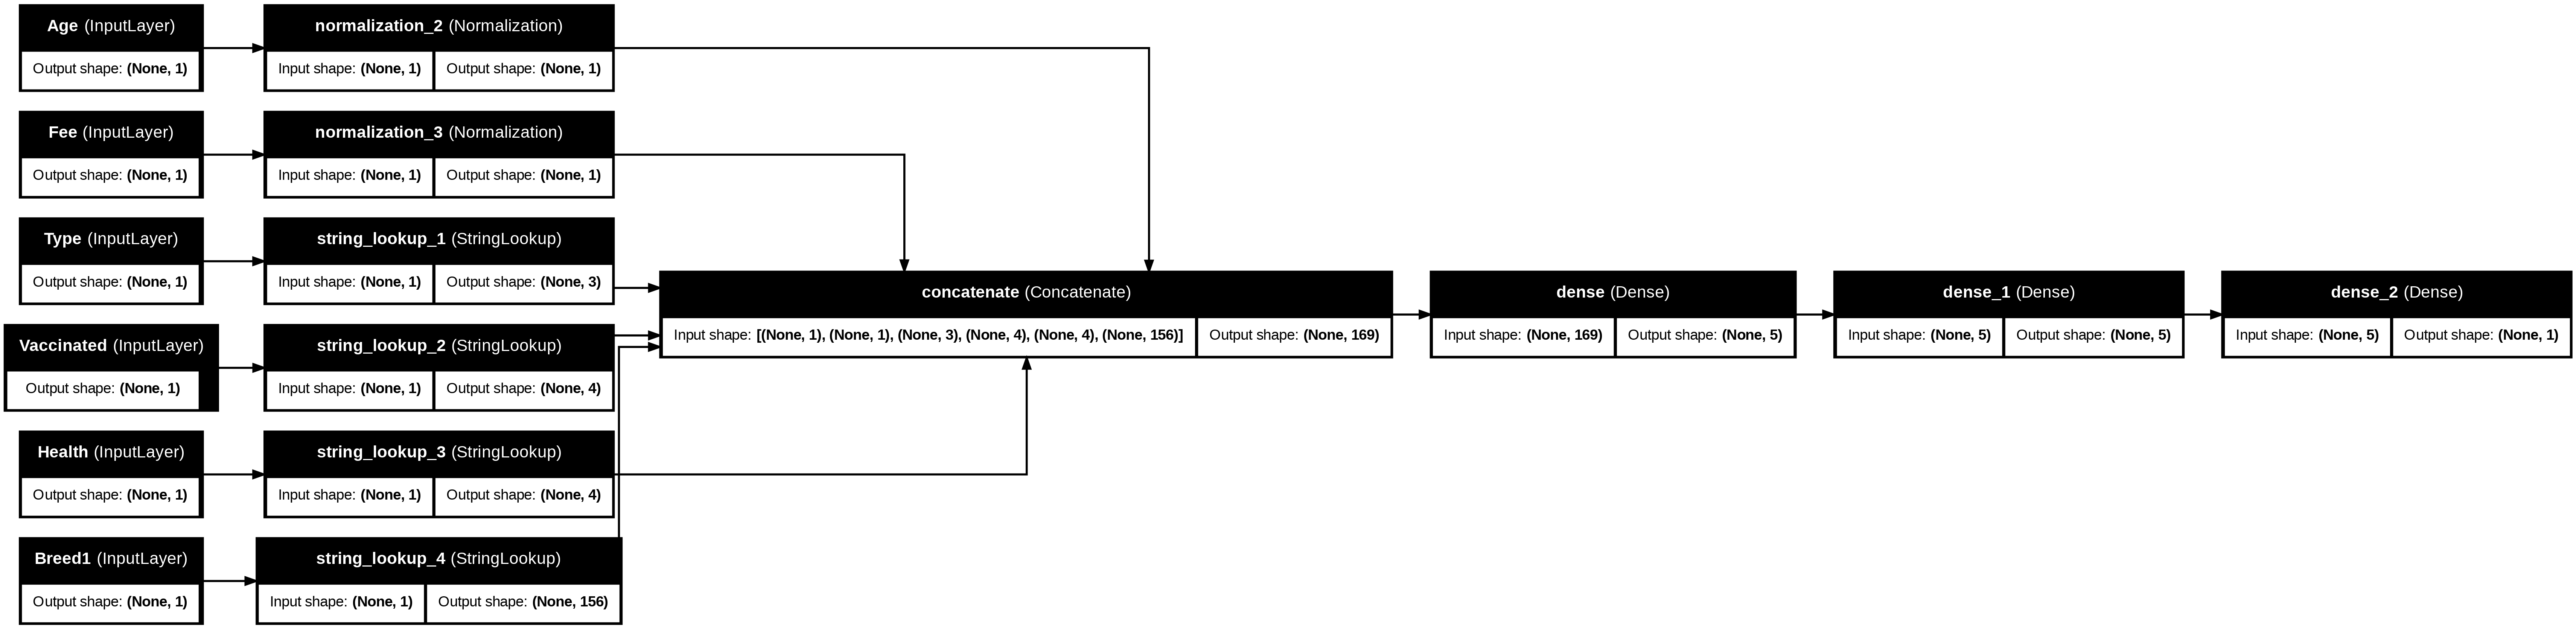

In [48]:
# Usar `rankdir='LR'` para un gráfico horizontal
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR")

Entrenar el modelo

In [49]:
salida = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7217 - loss: 0.5656 - val_accuracy: 0.7092 - val_loss: 0.5587
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7369 - loss: 0.5281 - val_accuracy: 0.7092 - val_loss: 0.5652
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7324 - loss: 0.5258 - val_accuracy: 0.7092 - val_loss: 0.5748
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7346 - loss: 0.5277 - val_accuracy: 0.7092 - val_loss: 0.5664
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.5323 - val_accuracy: 0.7135 - val_loss: 0.5579
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7396 - loss: 0.5165 - val_accuracy: 0.7092 - val_loss: 0.6069
Epoch 7/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7362 - loss: 0.5175 - val_accuracy: 0.7092 - val_loss: 0.5758
Epoch 8/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7320 - loss: 0.5178 - val_accuracy: 0.